# Graphics in Python
In this tutorial, I will go over some of the basics of how to generate graphs and plots using Python. I will describe the usage of `matplotlib`. I will only be reviewing some basics. The purpose is to provide a general idea of how `matplotlib` works, not detail every plotting function. The matplotlib website has great examples and detailed code on how to generate a variety of plots. I highly recommend viewing their documentation when trying to make your own plots (I still regularly refer to their docs)

https://matplotlib.org/

I also should mention `seaborn`. `seaborn` is a library that is an extension to `matplotlib`. It provides a simpler interface for some type of plots. For example, to make a scatter matrix in `matplotlib` requires a bit of data manipulation and different plot functions. `seaborn` can accomplish this with a single statement (with a variety of options). I recommend downloading `seaborn` and going through the documentation when creating your own plots. I will not detail `seaborn`, since I want to focus on the lower-level graphic interface. You can read more about `seaborn` here

https://seaborn.pydata.org/

## The Basics
I will review some basic functionalities

### Matplotlib Magic
This section *only* applies to JuPyter Notebooks. Since this tutorial uses JuPyter Notebook, we can use "matplotlib magic" to have our plots display in-line. 

In [1]:
%matplotlib inline

Running that line ensures our plots will be displayed right below the code in our notebook. How the graphics generated by `matplotlib` are displayed differs by your IDE. Some IDE's like y-hat's Rodeo display plots in the IDE directly (like R Studio), while others like IDLE and PyCharm open a separate window with the plot. This latter behavior is also the same when running scripts in Command Prompt / Terminal

### Creating a plot
I will start with plotting a single point. We can do that by using `plot`.

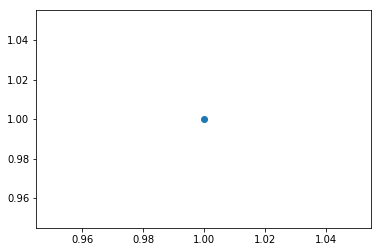

In [2]:
import matplotlib.pyplot as plt

plt.plot(1, 1, 'o')
plt.show()

So, let's break down that previous code. All the plotting functions I will describe are within `matplotlib.pyplot`, which we shorten to import as `plt`. Then we use the `plot()` function to add a single point. The first argument is the `x` values, and the second is the `y` values. Lastly, we have `'o'`, which tells `matplotlib` to plot points (the default is a line, which is not nothing for a single point). Finally, we use `plt.show()`. This command tells `matplotlib` to return our plot. **This argument is vital**. When I was first learning Python, I did not understand the need for this function. As a result, no plot would display when I ran my code. If no plot displays, you likely forget to add `plt.show()` in your code

Let's now plot a line instead. We will create a lists of x and y points

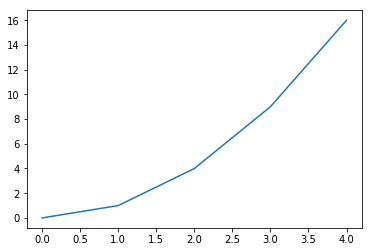

In [3]:
x = [0, 1, 2, 3, 4]
y = [0, 1, 4, 9, 16]

plt.plot(x, y)
plt.show()

### Colors, Styles, and Opacity. Oh my!
While the above blue is fine, often you want to control the colors directly. You can do this by passing the optional argument `c` and specify the color you want the line to be. `matplotlib` has a variety of keywords for different colors. I never remember them, so I recommend looking at https://matplotlib.org/examples/color/named_colors.html (I refer to this regularly when creating plots)

To change how the line displays, we can specify the optional argument `linestyle`. The different options available for `linestyle` are available here: https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

To change how points are displayed, we can specify the optional argument `marker`. The available options are detailed here: https://matplotlib.org/api/markers_api.html

Lastly, we can change the opacity (transparency) of the lines. To do this, we can use the argument `alpha`. `alpha` is bounded between 0 and 1, where 0 is completely transparent and 1 is completely opaque

Now that we have these tools, let's redo our previous plot. This time we will plot a red dashed-line, with square points, and a slight transparency

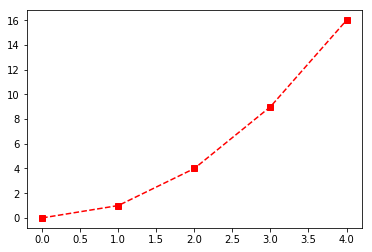

In [4]:
plt.plot(x, y, linestyle='--', marker='s', c='red')
plt.show()

### Absolute Control Over Axes
Now that we have our plot, we might want to add some labels and control which regions of the plot are displayed. We do this through using additional `matplotlib` arguments. Below is an example that I will break down

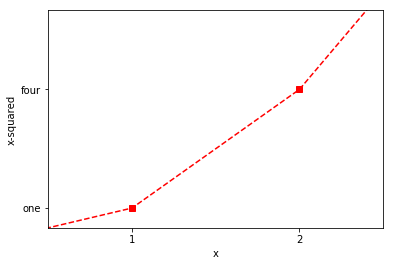

In [5]:
plt.plot(x, y, linestyle='--', marker='s', c='red')
plt.xlim([0.5, 2.5])  # Controls the x region displayed
plt.ylim([0.5, 6])  # Controls the y region displayed
plt.xlabel('x')  # Controls the x-axis label
plt.ylabel('x-squared')  # Controls the y-axis label
plt.xticks([1, 2])  # Controls the x-ticks displayed
plt.yticks([1, 4], ['one', 'four'])  # Controls the y-ticks displayed
plt.show()

As shown, `xlim` and `ylim` control the region space displayed by `matplotlib`. The default limits automatically make sure all points are displayed. `xlabel` and `ylabel` control the axes labels. `xticks` and `yticks` display the ticks. To replace specific labels with other numbers, you can provide an additional list of labels to be used for the corresponding points. This is shown in `yticks` in the above example.

### Saving plots
To save your plot, you should use `savefig()` function. It allows you to control and file type and the DPI (image resolution). As an example, let's save our previous plot to our current directory. 

In [6]:
plt.plot(x, y, linestyle='--', marker='s', c='red')
plt.xlim([0.5, 2.5])
plt.ylim([0.5, 6])
plt.xlabel('x')
plt.ylabel('x-squared')
plt.xticks([1, 2])
plt.yticks([1, 4], ['one', 'four'])
# plt.tight_layout makes sure nothing is cut-off when saving
plt.tight_layout()
# Saving the plot AFTER all our formatting and BEFORE show()/close()
plt.savefig('example_plot.png', format='png', dpi=300)
plt.close()

Note where the `savefig` function is used. It should be included after all the necessary plotting steps but before `plt.show()`. I also used another option we have not seen before. That is `plt.close()`. Like `plt.show()` that tells matplotlib we are done with the plot. However, `plt.close()` instead ends the plot without displaying it. This is useful if you don't want to look at each plot you generate and only want to save them to an external file. 

### Smoothing Lines
Our plot is meant to display $y = x^2$ but it is not that smooth. At each point, our plot bends unnaturally from the function we are plotting. There are two options we can use to smooth our line. Each option is dependent on the scenario we are in

#### Known Function
If we know the function, we can easily use `numpy` to generate an array of numbers then apply that function to the array. This would give `matplotlib` enough data points to make the plot appear to be smooth. `np.linspace` will generate an evenly-spaced array of numbers from $start$ to $stop$. We will have 100 points created between 0 to 4. We then calculate y based on our function, then plot

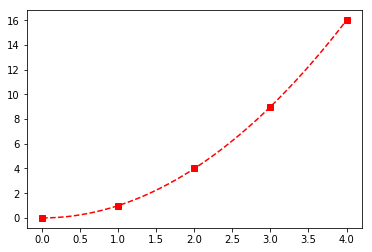

In [7]:
import numpy as np

x_s = np.linspace(0, 4, num=100)
y_s = x_s**2

plt.plot(x, y, linestyle='', marker='s', c='red')
plt.plot(x_s, y_s, linestyle='--', c='red')
plt.show()

Note, that I stacked `plot` statements. You can keep stacking different displays into a single plot. This is how you would display multiple lines. Now our curve looks nice and smooth. Hooray!

#### Unknown function
When we don't know the true function, we need a different approach. We can use `scipy` to create an arbitrary spline to fit our data. This will result in a nice smooth plot. Let's demonstrate

c:\users\zivic\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  


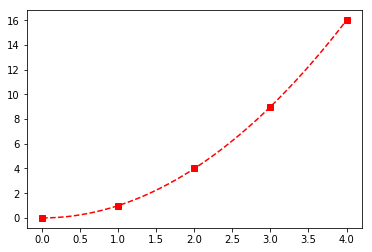

In [8]:
from scipy.interpolate import spline

# Creating corresponding x values
x_t = np.linspace(0, 4, num=100)
# Spline values for np.linspace following observed points
y_t = spline(x, y, x_s)

plt.plot(x, y, linestyle='', marker='s', c='red')
plt.plot(x_t, y_t, linestyle='--', c='red')
plt.show()

Hooray! Our curve is smooth again and we didn't even need to know the true function to do it. `scipy.interpolate.spline` is deprecated (as indicated in the warning), so you should use Bspline instead (as the warning recommends)

This concludes the absolute basics of plotting. You are now ready to create your own plots. 

## Example Plots
Let's go through some examples with an actual data set (rather than the arbitrary function I chose). I will assume you have went through the data management tutorial before this. We will use the SAS data set included in this directory

In [9]:
import pandas as pd

df = pd.read_sas('sample_sas.sas7bdat')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 8 columns):
id      547 non-null float64
male    547 non-null float64
age0    547 non-null float64
cd40    547 non-null float64
dvl0    547 non-null float64
art     547 non-null float64
dead    517 non-null float64
t       547 non-null float64
dtypes: float64(8)
memory usage: 34.3 KB


Let's start with a basic histogram of CD4 T-cell counts (`cd40`). To accomplish this, we will use `plt.hist()`. The first argument in `hist` is the array of values we want to generate the histogram with. We will also specify the `bins` option, which allows us to control the number of bins

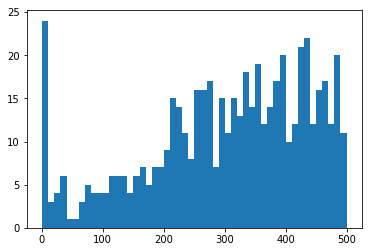

In [10]:
plt.hist(df['cd40'], bins=50)
plt.show()

Awesome! Let's stratify by `art` to see who was treated at baseline versus who was not. 

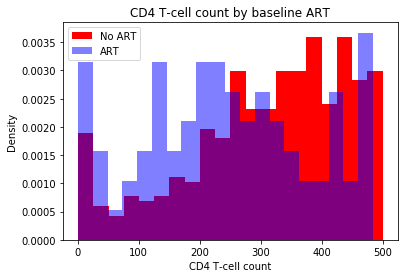

In [11]:
# Subsetting out the data I want to plot
yes_art = df.loc[df['art']==1, 'cd40'].copy()
no_art = df.loc[df['art']==0, 'cd40'].copy()

# Creating histogram
plt.hist(no_art, color='red', bins=20, alpha=1, label='No ART', density=True)
plt.hist(yes_art, color='blue', bins=20, alpha=0.5, label='ART', density=True)
plt.legend()
plt.title('CD4 T-cell count by baseline ART')
plt.xlabel('CD4 T-cell count')
plt.ylabel('Density')
plt.show()

I added a few more arguments and functions. First, `hist(..., density=True)` plots the density at each point rather than the count. `hist(..., label)` gives a label to each part of the plot. These labels are used by `plt.legend()` to create our legend. Finally, I added a title with `plt.title`. 

While I like this histogram, we can do better. Specifically, we can use kernel-smoothing to get a nice smooth plot of CD4 T-cell counts by ART treatment. To do this, we will use `scipy` to access some kernel smoothers. Below is an example

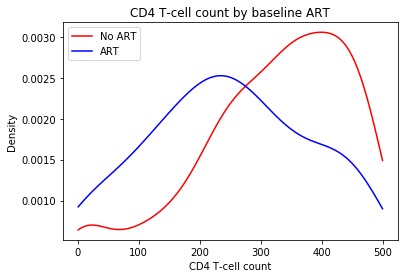

In [12]:
from scipy.stats.kde import gaussian_kde

# Kernel Density Estimating
yes_art_d = gaussian_kde(yes_art)
no_art_d = gaussian_kde(no_art)

# Values to plot between
xvals = np.linspace(np.min(df['cd40']), np.max(df['cd40']), 100)

# Plotting Smoothed 
plt.plot(xvals, no_art_d(xvals), color='red', alpha=1, label='No ART')
plt.plot(xvals, yes_art_d(xvals), color='blue', alpha=1, label='ART')
plt.legend()
plt.title('CD4 T-cell count by baseline ART')
plt.xlabel('CD4 T-cell count')
plt.ylabel('Density')
plt.show()

Great! I like this format a little better (even though we do lose information). However, we can do even better. Let's shade in the areas under the curves. We can do that by using `plt.fill_between()`. Not that I do the fill between part before the lines! This is because matplotlib follows the order of operations when overlaying additional plot items

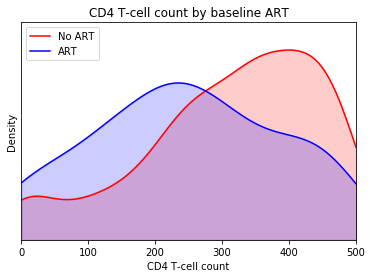

In [13]:
plt.fill_between(xvals, no_art_d(xvals), color='red', alpha=0.2, label=None)
plt.fill_between(xvals, yes_art_d(xvals), color='blue', alpha=0.2, label=None)
plt.plot(xvals, no_art_d(xvals), color='red', alpha=1, label='No ART')
plt.plot(xvals, yes_art_d(xvals), color='blue', alpha=1, label='ART')
plt.legend()
plt.title('CD4 T-cell count by baseline ART')
plt.xlabel('CD4 T-cell count')
plt.ylabel('Density')
plt.xlim([0, 500])
plt.ylim([0, 0.0035])
plt.yticks([])
plt.show()

I am happy with the plot now. It conveys the information that those given ART had a lower CD4 T-cell count compared to those not given ART. This is easily seen in the non-overlapping regions.

As practice, try doing something similar with age on your own. 

### Missing Data
Before ending this section, I wanted to discuss missing data. As you will consistently find, `nan` will continue to haunt us. In our data, `dead` has some missing values. Let's see what happens when we try to make a histogram with `nan`

c:\users\zivic\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
c:\users\zivic\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

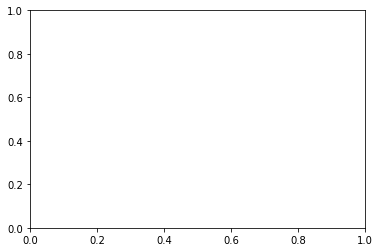

In [14]:
plt.hist(df['dead'])
plt.show()

Oh no! That's quite an error. Furthermore, the warning message is not that clarifying. Luckily for us, I know what is breaking our code (because it has happened to me many times before). It's those dreaded `nan`'s in our data. Essentially, `matplotlib` ends up being confused when `nan` exists in the data. 

To prevent errors like this, `matplotlib` should only be given data that has all the `nan`'s removed. We can easily do this with `pandas` `dropna()` function. 

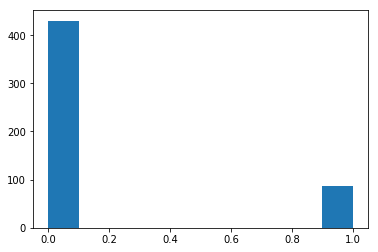

In [15]:
plt.hist(df['dead'].dropna())
plt.show()

Much better. So, remember if `matplotlib` has some error when you try to plot some data, check that there is no missing first! It might save you a headache 

## Complex Plotting
Now that we have the basics, let's get more complicated with our plots

### Multi-plots
What if we want to have multiple plots nested in a single plot? `matplotlib` has our answer. We can use `subplot`. To motivate our example, we want a histogram of age and a histogram of CD4 T-cell count side-by-side.

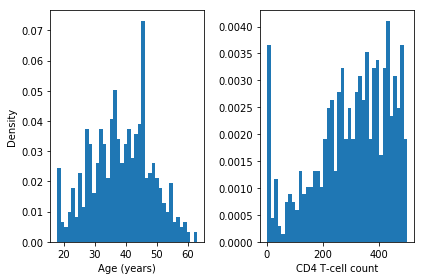

In [16]:
# Histogram for age
plt.subplot(121)
plt.hist(df['age0'], bins=40, density=True)
plt.xlabel('Age (years)')
plt.ylabel('Density')

# Histogram for CD4
plt.subplot(122)
plt.hist(df['cd40'], bins=40, density=True)
plt.xlabel('CD4 T-cell count')
plt.tight_layout()
plt.show()

The `subplot` argument takes an integer with three numbers as input. The first number is how many rows of plots, the second is how many columns of plots, and the last number is the current index of the plot. Note, that this has to be called before each distinct plot. Additionally, we need to update the index (third number)

An alternative approach is to use `gridspec` which allow you to finely control how multiple plots are displayed. Returing to our previous example, let's say we can the age histogram to take up only a third of the plot, while CD4 histogram takes up the remainder

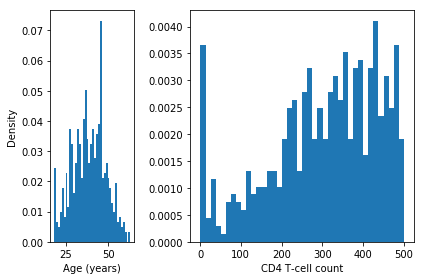

In [17]:
import matplotlib.gridspec as gridspec

# Specify the grid to use for the graph
gspec = gridspec.GridSpec(1, 3)

# Assigning a portion of the grid
p1 = plt.subplot(gspec[0, 0:1])
# Assigning a portion of the grid
p2 = plt.subplot(gspec[0, 1:])

# Histogram for age
p1.hist(df['age0'], bins=40, density=True)
p1.set_xlabel('Age (years)')
p1.set_ylabel('Density')

# Histogram for CD4
p2.hist(df['cd40'], bins=40, density=True)
p2.set_xlabel('CD4 T-cell count')

# Generating plot
plt.tight_layout()
plt.show()

You will notice that `xlabel` changed to `set_xlabel`. This is how you update the x label on a a `matplotlib` `axes` object. If you were to use `xlabel` instead you would get an error. These differences apply to `xticks`, `xlim`, the corresponding `y` functionalities, and `title`. 

Fine control over `matplotlib` objects generally requires accessing a `axes` object. So, depending on how your plot is going, you may need to convert to `set_`. As a result, I would hold off on these specific labelling/axes changes until you are happy with the actual plot.

### Controlling Figure Size
When saving your figure, you may want to control the actual size of the figure. You can do this by specifying the `plt.figure(figsize)` argument. 

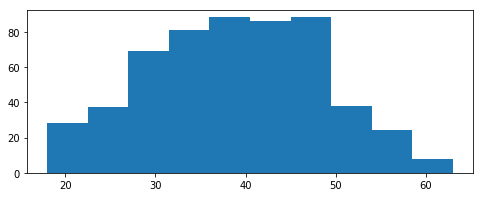

In [18]:
plt.figure(figsize=(8,3))
plt.hist(df['age0'])
plt.show()

### Animations
Before concluding, I wanted to talk about animations. `matplotlib` also supports animations! To demonstrate, let's have an animation that displays random draws from different distributions. We will use Normal, Gamma, Exponential, and Uniform distributions. Below is code to create this animation

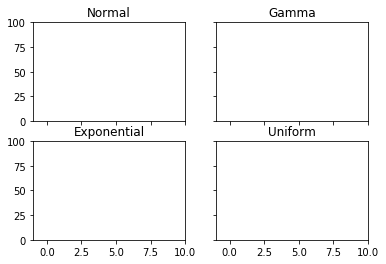

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

n = 1000
x1 = np.random.normal(5,1,n)
x2 = np.random.gamma(1,1,n)
x3 = np.random.exponential(2,n)
x4 = np.random.uniform(0,6,n)
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharey=True,sharex=True)

def update(curr):
    if curr == n: 
        a.event_source.stop()
    bins = np.arange(-10, 10, 0.5)
    ax1.hist(x1[:curr],color='r',bins=bins)
    ax1.set_title('Normal')
    ax1.set_xlim([-1,10])
    ax1.set_ylim([0,100])
    ax2.hist(x2[:curr],color='green',bins=bins)
    ax2.set_title('Gamma')
    ax3.hist(x3[:curr],color='b',bins=bins)
    ax3.set_title('Exponential')
    ax4.hist(x4[:curr],color='orange',bins=bins)
    ax4.set_title('Uniform')

    
a = animation.FuncAnimation(fig, update, interval=20)
plt.show()

*Note*: I was unable to get the animation to properly embed into the jupyter notebook (it is possible) but I was having some trouble. To see the animation for yourself, copy the code and run it in your IDE of choice

# Conclusion
In this tutorial, I review `matplotlib` and went through how to generate several different plots. You have nearly unlimited control over your plots with `matplotlib` and there is a lot you can do that I have no covered here. See the `matplotlib` docs for further discussion of these. Additionally, I provided a brief example of `seaborn`. 